In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


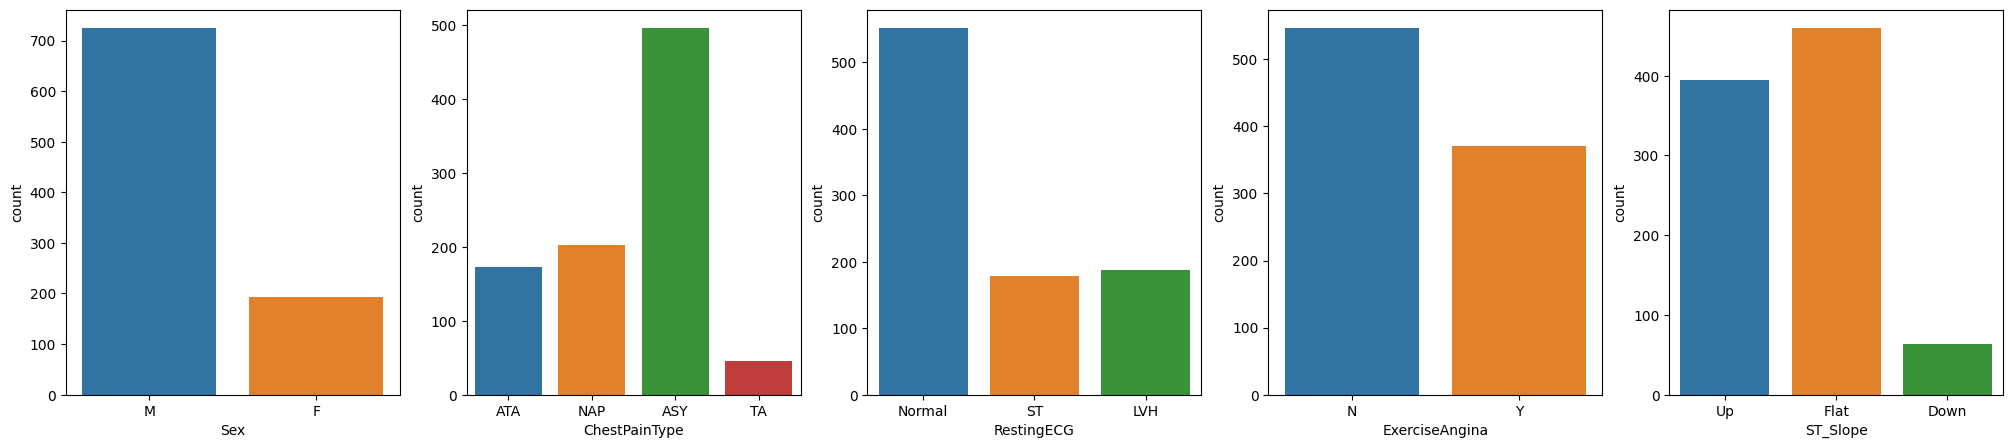

In [4]:
cat=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
plt.figure(figsize=(25,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  sns.countplot(x=cat[i],data=data)
 



In [5]:
data[data.HeartDisease == 1]['Sex'].value_counts()

Sex
M    458
F     50
Name: count, dtype: int64

Text(0.5, 1.0, 'ChestPainType')

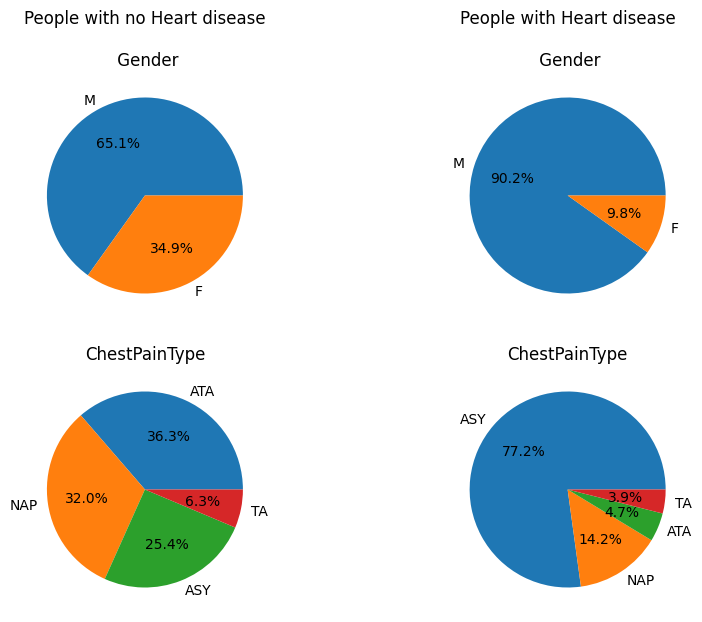

In [6]:

fig,axs = plt.subplots(2,2,figsize = (10,7))
axs[0, 0].pie( data[data.HeartDisease == 0]['Sex'].value_counts(), labels= data[data.HeartDisease == 0]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['Sex'].value_counts(), labels= data[data.HeartDisease == 1]['Sex'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n Gender")
axs[0,1].set_title("People with Heart disease\n\n Gender")
axs[1, 0].pie( data[data.HeartDisease == 0]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 0]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1, 1].pie( data[data.HeartDisease == 1]['ChestPainType'].value_counts(), labels= data[data.HeartDisease == 1]['ChestPainType'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ChestPainType")
axs[1,1].set_title("ChestPainType")

Text(0.5, 1.0, 'FastingBS')

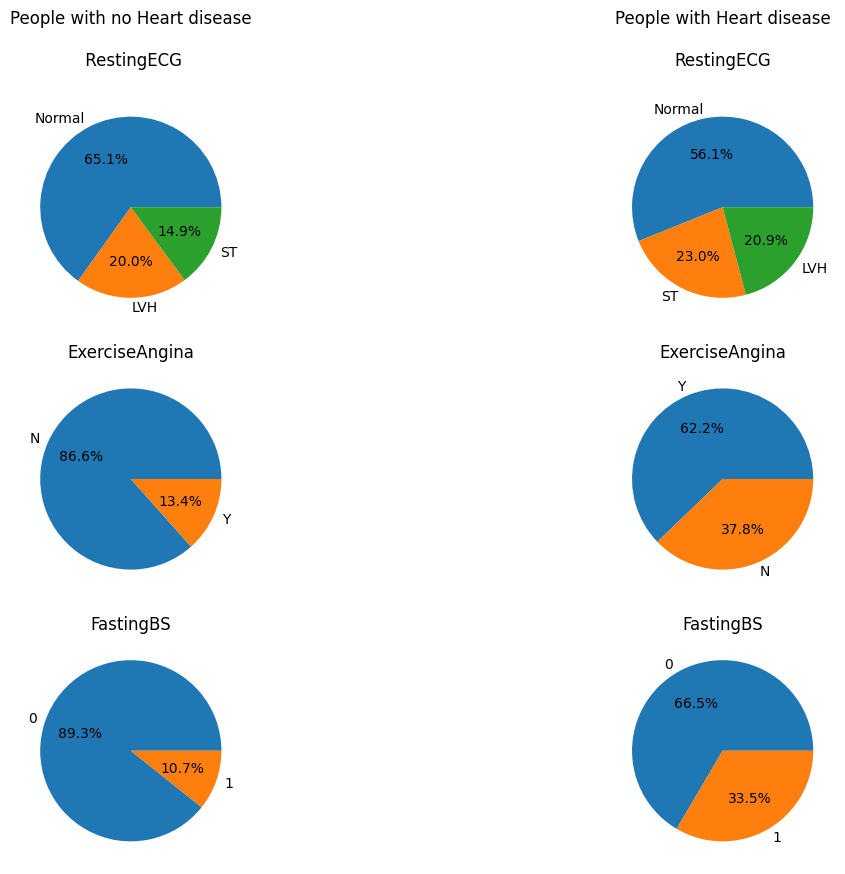

In [7]:
fig,axs = plt.subplots(3,2,figsize = (14,10))
axs[0, 0].pie( data[data.HeartDisease == 0]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 0]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0, 1].pie( data[data.HeartDisease == 1]['RestingECG'].value_counts(), labels= data[data.HeartDisease == 1]['RestingECG'].value_counts().index, autopct='%1.1f%%')
axs[0,0].set_title("People with no Heart disease\n\n RestingECG\n")
axs[0,1].set_title("People with Heart disease\n\nRestingECG\n")
axs[1, 0].pie( data[data.HeartDisease == 0]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 0]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,0].set_title("ExerciseAngina")
axs[1, 1].pie( data[data.HeartDisease == 1]['ExerciseAngina'].value_counts(), labels= data[data.HeartDisease == 1]['ExerciseAngina'].value_counts().index, autopct='%1.1f%%')
axs[1,1].set_title("ExerciseAngina")
axs[2, 0].pie( data[data.HeartDisease == 0]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 0]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,0].set_title("FastingBS")
axs[2, 1].pie( data[data.HeartDisease == 1]['FastingBS'].value_counts(), labels= data[data.HeartDisease == 1]['FastingBS'].value_counts().index, autopct='%1.1f%%')
axs[2,1].set_title("FastingBS")

<Axes: xlabel='RestingBP', ylabel='Count'>

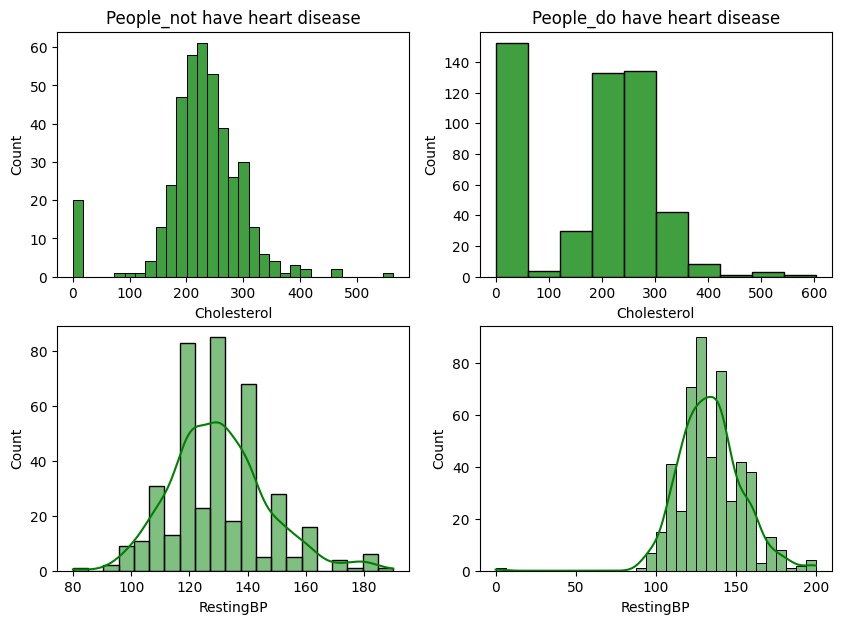

In [8]:
fig,axs = plt.subplots(2,2,figsize = (10,7))
sns.histplot(data[data.HeartDisease ==0].Cholesterol,ax = axs[0,0],color = 'green')
axs[0,0].set_title("People_not have heart disease")
sns.histplot(data[data.HeartDisease ==1].Cholesterol,ax = axs[0,1],color = 'green')
axs[0,1].set_title("People_do have heart disease")
sns.histplot(data[data.HeartDisease ==0].RestingBP,ax = axs[1,0],kde = True,color = 'green')
sns.histplot(data[data.HeartDisease ==1].RestingBP,ax = axs[1,1],kde = True,color = 'green')

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [10]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [11]:
x=data.drop('HeartDisease', axis=1).values.reshape(-1,1)
y=data['HeartDisease'].values.reshape(-1,1)


In [12]:
item=['RestingBP','Cholesterol']
for i in range(len(item)):
    print(f'nl \n ',data[item[i]].nlargest(3))
    print(f'ns \n ',data[item[i]].nsmallest(3))


nl 
  241    200
365    200
399    200
Name: RestingBP, dtype: int64
ns 
  449     0
314    80
227    92
Name: RestingBP, dtype: int64
nl 
  149    603
616    564
76     529
Name: Cholesterol, dtype: int64
ns 
  293    0
294    0
295    0
Name: Cholesterol, dtype: int64


In [13]:
print(f'nl \n ',data['MaxHR'].nlargest(3))
print(f'ns \n ',data['MaxHR'].nsmallest(3))

nl 
  829    202
759    195
795    194
Name: MaxHR, dtype: int64
ns 
  390    60
370    63
402    67
Name: MaxHR, dtype: int64


In [14]:
print(data.dtypes)

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


In [15]:
data['RestingBP'] = pd.to_numeric(data['RestingBP'], errors='coerce')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')

In [16]:
data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x > 140 else x)
data['RestingBP']=data['RestingBP'].apply(lambda x: np.nan if x < 40 else x)
data['Cholesterol']=data['Cholesterol'].replace(0,np.nan)

In [17]:
data.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP         221
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [18]:
data['RestingBP']=data['RestingBP'].replace(np.nan,data['RestingBP'].median())
data['Cholesterol']=data['Cholesterol'].replace(np.nan,data['Cholesterol'].median())

In [19]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
x=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1, random_state = 1)

LogisticRegression

In [24]:
clf=LogisticRegression(max_iter=320, solver='newton-cg')

In [25]:
clf.fit(X_train,Y_train)

LogisticRegression(max_iter=320, solver='newton-cg')

In [26]:
y_pred=clf.predict(X_test)

In [27]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        37
           1       0.96      0.95      0.95        55

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



In [28]:
clf.score(x,y)

0.8529411764705882

In [29]:
LOAC=metrics.accuracy_score(Y_test,y_pred)

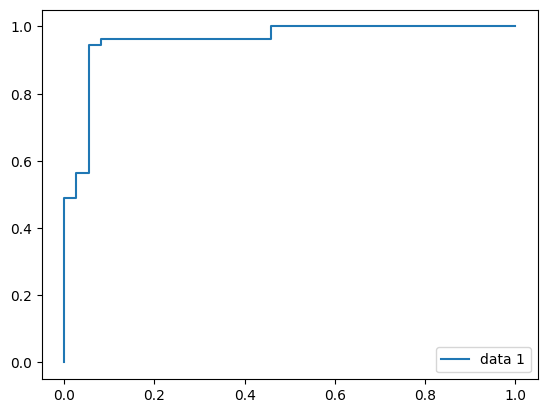

In [30]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
k=20
acc=np.zeros((k))
for i in range (1,k+1):
    nclf=KNeighborsClassifier(n_neighbors=i)
    nclf.fit(X_train,Y_train)
    ny_pred=nclf.predict(X_test)
    acc[i-1]=metrics.accuracy_score(Y_test,ny_pred)
acc

array([0.76086957, 0.7173913 , 0.75      , 0.68478261, 0.70652174,
       0.69565217, 0.7173913 , 0.68478261, 0.76086957, 0.7173913 ,
       0.70652174, 0.68478261, 0.69565217, 0.68478261, 0.75      ,
       0.68478261, 0.72826087, 0.68478261, 0.72826087, 0.68478261])

In [33]:
acc.max()

0.7608695652173914

In [34]:
nclf=KNeighborsClassifier(n_neighbors=9)
nclf.fit(X_train,Y_train)
ny_pred=nclf.predict(X_test)
KNAC=metrics.accuracy_score(Y_test,ny_pred)


In [35]:
print(classification_report(Y_test,ny_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        37
           1       0.80      0.80      0.80        55

    accuracy                           0.76        92
   macro avg       0.75      0.75      0.75        92
weighted avg       0.76      0.76      0.76        92



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DecisionTreeClassifier

In [37]:
dtclf=DecisionTreeClassifier(max_depth=3)
dtclf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
dty_pred=dtclf.predict(X_test)

In [39]:
DTAC=metrics.accuracy_score(Y_test,dty_pred)

In [40]:
from sklearn import tree

In [41]:
text_representation=tree.export_text(dtclf)
print(text_representation)

|--- feature_10 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_7 <= 151.00
|   |   |   |--- class: 1
|   |   |--- feature_7 >  151.00
|   |   |   |--- class: 0
|--- feature_10 >  1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_9 <= 0.45
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.45
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- feature_9 <= 2.20
|   |   |   |--- class: 0
|   |   |--- feature_9 >  2.20
|   |   |   |--- class: 1



In [42]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

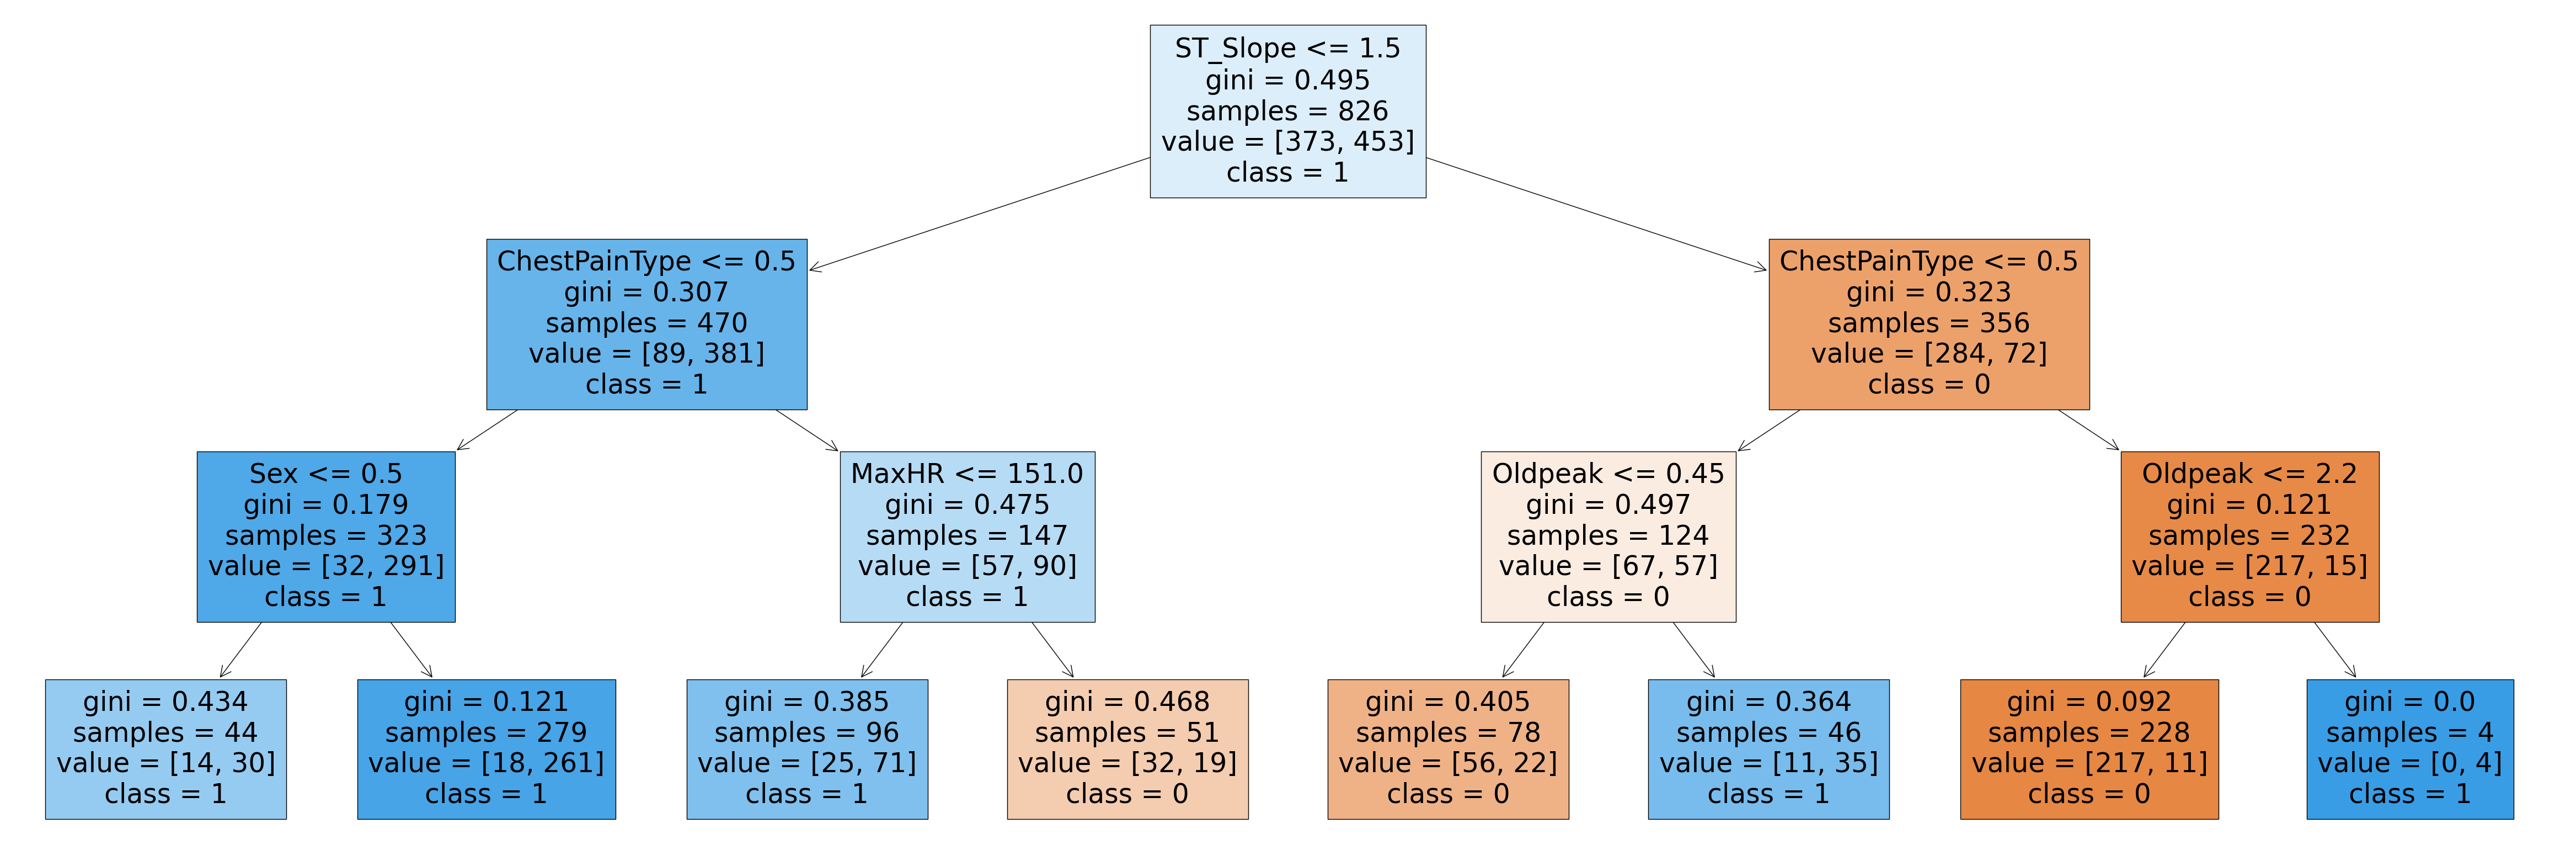

In [43]:
f_n=["Age","Sex","ChestPainType","RestingBP","Cholesterol","FastingBS","RestingECG","MaxHR","ExerciseAngina","Oldpeak",'ST_Slope']
t_n=["0","1"]
fig=plt.figure(figsize=(60,20),dpi=100)
plot=tree.plot_tree(dtclf,feature_names=f_n,class_names=t_n,filled=True)
plt.show()

In [44]:
rfclf=RandomForestClassifier(n_estimators=160,max_depth=5,random_state=110)
rfclf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=160, random_state=110)

In [45]:
rfy_pred=rfclf.predict(X_test)

In [46]:
RFAC=metrics.accuracy_score(Y_test,rfy_pred)

In [47]:
print(classification_report(Y_test,rfy_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.96      0.96      0.96        55

    accuracy                           0.96        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.96      0.96      0.96        92



In [48]:
from sklearn.naive_bayes import GaussianNB

GaussianNB

In [49]:
Gclf=GaussianNB()
Gclf.fit(X_train,Y_train)

GaussianNB()

In [50]:
Gy_pred=Gclf.predict(X_test)
GAC=metrics.accuracy_score(Y_test,Gy_pred)
GAC

0.9239130434782609

In [51]:
from sklearn.svm import SVC

SVC


In [52]:
svcclf=SVC(kernel='linear')
svcclf.fit(X_train,Y_train)


SVC(kernel='linear')

In [53]:
svcy_pred=svcclf.predict(X_test)
svcAC=metrics.accuracy_score(Y_test,svcy_pred)
svcAC

0.9565217391304348

In [54]:
compar=pd.DataFrame(columns=["algorithm","Accuracy"])
compar.loc[len(compar)] = ['LogisticRegression', LOAC]
compar.loc[len(compar)] = ['KNeighborsClassifier', KNAC]
compar.loc[len(compar)] = ['DecisionTreeClassifier', DTAC]
compar.loc[len(compar)] = ['RandomForestClassifier', RFAC]
compar.loc[len(compar)] = ['GaussianNB', GAC]
compar.loc[len(compar)] = ['svc', svcAC]


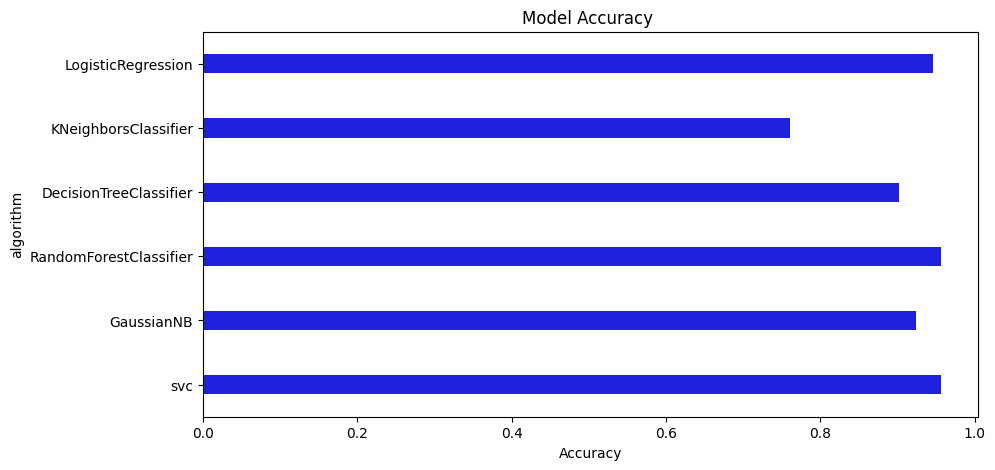

In [55]:
plt.figure(figsize=[10,5])
plt.title('Model Accuracy ')
sns.barplot(x='Accuracy', y='algorithm', data=compar ,width=0.3,color='blue')
plt.show()



In [56]:
compar

,algorithm,Accuracy
0,LogisticRegression,0.945652
1,KNeighborsClassifier,0.760870
2,DecisionTreeClassifier,0.902174
3,RandomForestClassifier,0.956522
4,GaussianNB,0.923913
5,svc,0.956522
